## Fuel Price analysis and prediction


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 


In [12]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [14]:
# varify the the data set sucessfully loaded
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
43,2014,AUDI,Q7 TDI CLEAN DIESEL,SUV - STANDARD,3.0,6,AS8,D,12.9,8.4,10.9,26,294
616,2014,KIA,RIO,COMPACT,1.6,4,M6,X,8.7,6.4,7.7,37,177
838,2014,NISSAN,ARMADA 4WD,SUV - STANDARD,5.6,8,A5,X,19.1,13.4,16.5,17,380
749,2014,MERCEDES-BENZ,E 550 COUPE,SUBCOMPACT,4.7,8,AS7,Z,13.4,8.9,11.4,25,262
218,2014,CHEVROLET,EXPRESS 1500 CARGO CONV AWD,VAN - CARGO,5.3,8,A4,E,25.3,19.3,22.6,12,362


In [17]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Extract necessary variable for the analysis

In [27]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### Explor the data

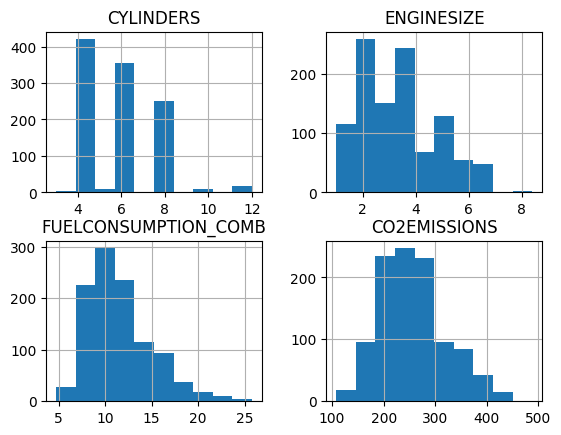

In [29]:
# consider the histogram of each items
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

### ploting the scatter plot for the showing the relationship between enginesize vs co2emissions

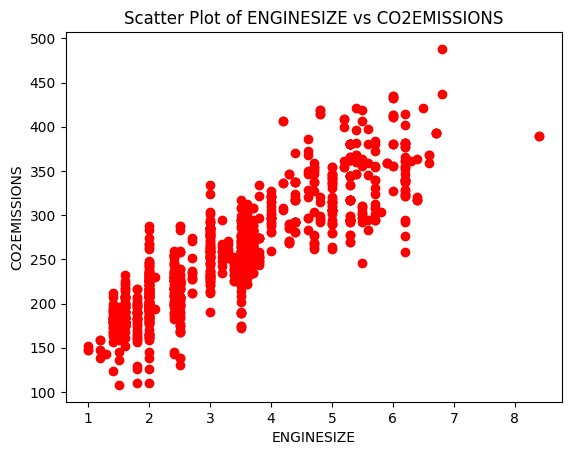

In [26]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Scatter Plot of ENGINESIZE vs CO2EMISSIONS")
plt.show()

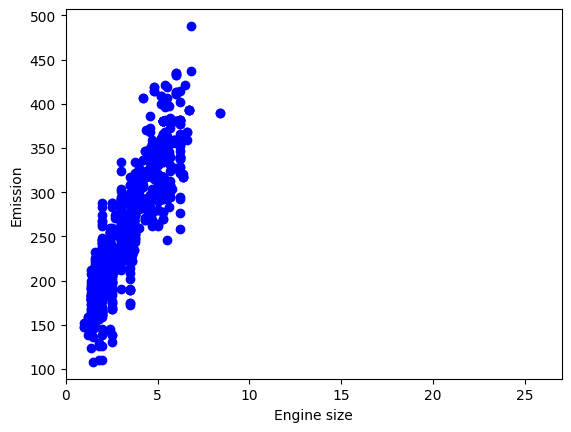

In [32]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

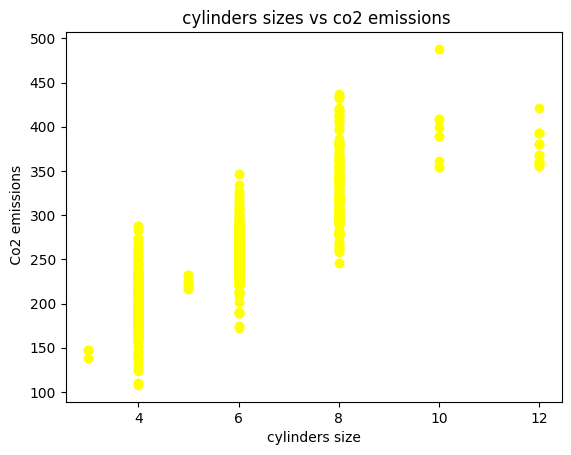

In [35]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color="yellow")
plt.xlabel("cylinders size")
plt.ylabel(" Co2 emissions")
plt.title(" cylinders sizes vs co2 emissions")
plt.show()

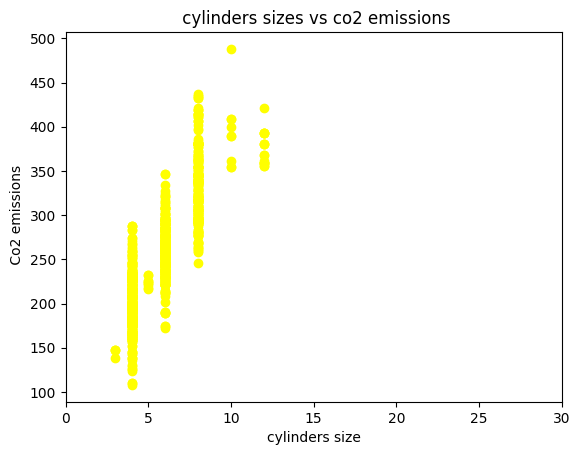

In [36]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color="yellow")
plt.xlabel("cylinders size")
plt.ylabel(" Co2 emissions")
plt.xlim(0,30)
plt.title(" cylinders sizes vs co2 emissions")
plt.show()

## Extract the features and labels from data set

In [37]:
X=cdf.ENGINESIZE.to_numpy()
y=cdf.CO2EMISSIONS.to_numpy()

### split the data set into trian and test 


In [53]:
from sklearn.model_selection import train_test_split
X_trian,X_test,y_trian, y_test=train_test_split(X,y,test_size=0.2, random_state=17)

### checking the outputs are the one dimensionly or vectors

In [54]:
type(X_trian), np.shape(X_test), np.shape(y_test)

(numpy.ndarray, (214,), (214,))

### Now fitting the linear Regression Model


In [55]:
from sklearn import linear_model
# create a model object
slr=linear_model.LinearRegression()
# trian the model on the training data
slr.fit(X_trian.reshape(-1, 1),y_trian)
# print the coeffiecients and the intercept
print("Coeffiecient:", slr.coef_[0])
print("Intercept:",slr.intercept_)


Coeffiecient: 39.18257585070482
Intercept: 125.37758015465843


### Here we are plotting the outputs for the train data


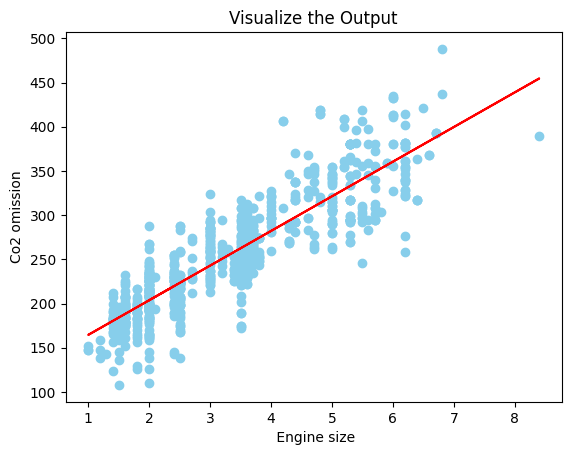

In [58]:
plt.scatter(X_trian, y_trian, color="skyblue")
plt.plot(X_trian, slr.coef_* X_trian+ slr.intercept_, "-r")
plt.xlabel(" Engine size")
plt.ylabel( "Co2 omission")
plt.title("Visualize the Output")
plt.show()

### Performance evaluation checking


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = slr.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 23.36
Mean squared error: 973.27
Root mean squared error: 31.20
R2-score: 0.70


In [61]:
### output checking for the y-test data 

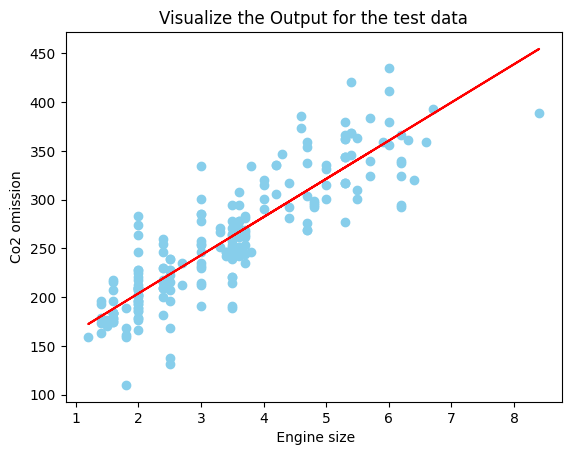

In [64]:
plt.scatter(X_test,y_test, color="skyblue")
plt.plot(X_test, slr.coef_* X_test+ slr.intercept_, "-r")
plt.xlabel(" Engine size")
plt.ylabel( "Co2 omission")
plt.title("Visualize the Output for the test data")
plt.show()